# **- Starter Code**

In [1]:
#Starter Code
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib 
import numpy
from timeit import default_timer as timer

# **- Given Functions**

In [2]:
#Function 1: Given an image, returns the image and it's squared version in array format
def toArrayAndSquare(im):
  img = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  sqr = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      img[j][i] = im.getpixel((i,j))
      sqr[j][i] = img[j][i] ** 2
  return img,sqr

#Function 2: Given an image, applies a certain threshold
def applyThreshold (im, th):
  res = [[0 for x in range(len(im[0]))] for y in range(len(im))]
  for i in range (0,len(im)):
    for j in range (0,len(im[0])):
      if(im[i][j]<th):
        res[i][j] = 0
      else:
        res[i][j] = 255
  return res

In [3]:
# Task 1

In [4]:
# Calculates the East and West Co-occurence Matrices of the give image
def calculateCoccurrence(img):
  imgArray, imgSquare = toArrayAndSquare(img)                   # Get a 2D array of the grayscale image
  EWcoArray = [[0 for x in range(256)] for y in range(256)]
  for row in range(len(imgArray) - 1):
    for col in range(len(imgArray[row]) - 1):
      EWcoArray[imgArray[row][col]][imgArray[row][col+1]] += 1  # This loop takes care of the East-West Co-occurence

  NScoArray = [[0 for x in range(256)] for y in range(256)]
  for row in range(len(imgArray) - 1):
    for col in range(len(imgArray[row])):
      NScoArray[imgArray[row][col]][imgArray[row+1][col]] += 1  # This loop take care of the North-South Co-occurence
  return EWcoArray, NScoArray


In [5]:
# Nullify the co-occurence matrix pixels based on a threshold
def nullifyPixels(EWcoMatrix, NScoMatrix, threshold):
  nullifiedEWMatrix = [[0 for x in range(256)] for y in range(256)]
  nullifiedNSMatrix = [[0 for x in range(256)] for y in range(256)]
  for row in range(len(EWcoMatrix)):
    for col in range(len(EWcoMatrix[row])):
      if abs(row - col) >= threshold:
        nullifiedEWMatrix[row][col] = EWcoMatrix[row][col]      # Handle the East-West pixel Nullification
        nullifiedNSMatrix[row][col] = NScoMatrix[row][col]      # Handle the North-Sout pixel Nullification       
  return nullifiedEWMatrix, nullifiedNSMatrix


In [6]:
# Reconstruct the image using the nullified co-occurrence matrices
def imgWithCooccurrence(originalImage, nullifiedEWMatrix, nullifiedNSMatrix):
  # Start with a zeroed-out image array
  newImageArray = [[0 for x in range(len(originalImage[0]))] for y in range(len(originalImage))] 
  for row in range(len(newImageArray)):
    for col in range(len(newImageArray[0]) - 1):
      if nullifiedEWMatrix[originalImage[row][col]][originalImage[row][col + 1]] != 0:
        newImageArray[row][col] = 255         # Whiten the pixel, as it's part of an edge
  for row in range(len(newImageArray) - 1):
    for col in range(len(newImageArray[row])):
      if nullifiedEWMatrix[originalImage[row][col]][originalImage[row + 1][col]] != 0:
        newImageArray[row][col] = 255       # Whiten the pixel, as it's part of an edge

  return newImageArray

In [7]:
########## MAIN CODE ##########

# Not needed to set a timer, but it will output the code execution time.
start = timer()

#plt.subplot(3,2,1)
img = Image.open("sample_image.jpg").convert("L")
imgArray = numpy.array(img)
matrixEW, martixNS = calculateCoccurrence(img)
matrixNullEW, matrixNullNS = nullifyPixels(matrixEW, martixNS, 30)
newImageArray = imgWithCooccurrence(imgArray, matrixNullEW, matrixNullNS)

end = timer()

print(end - start)

1.3599580169999999


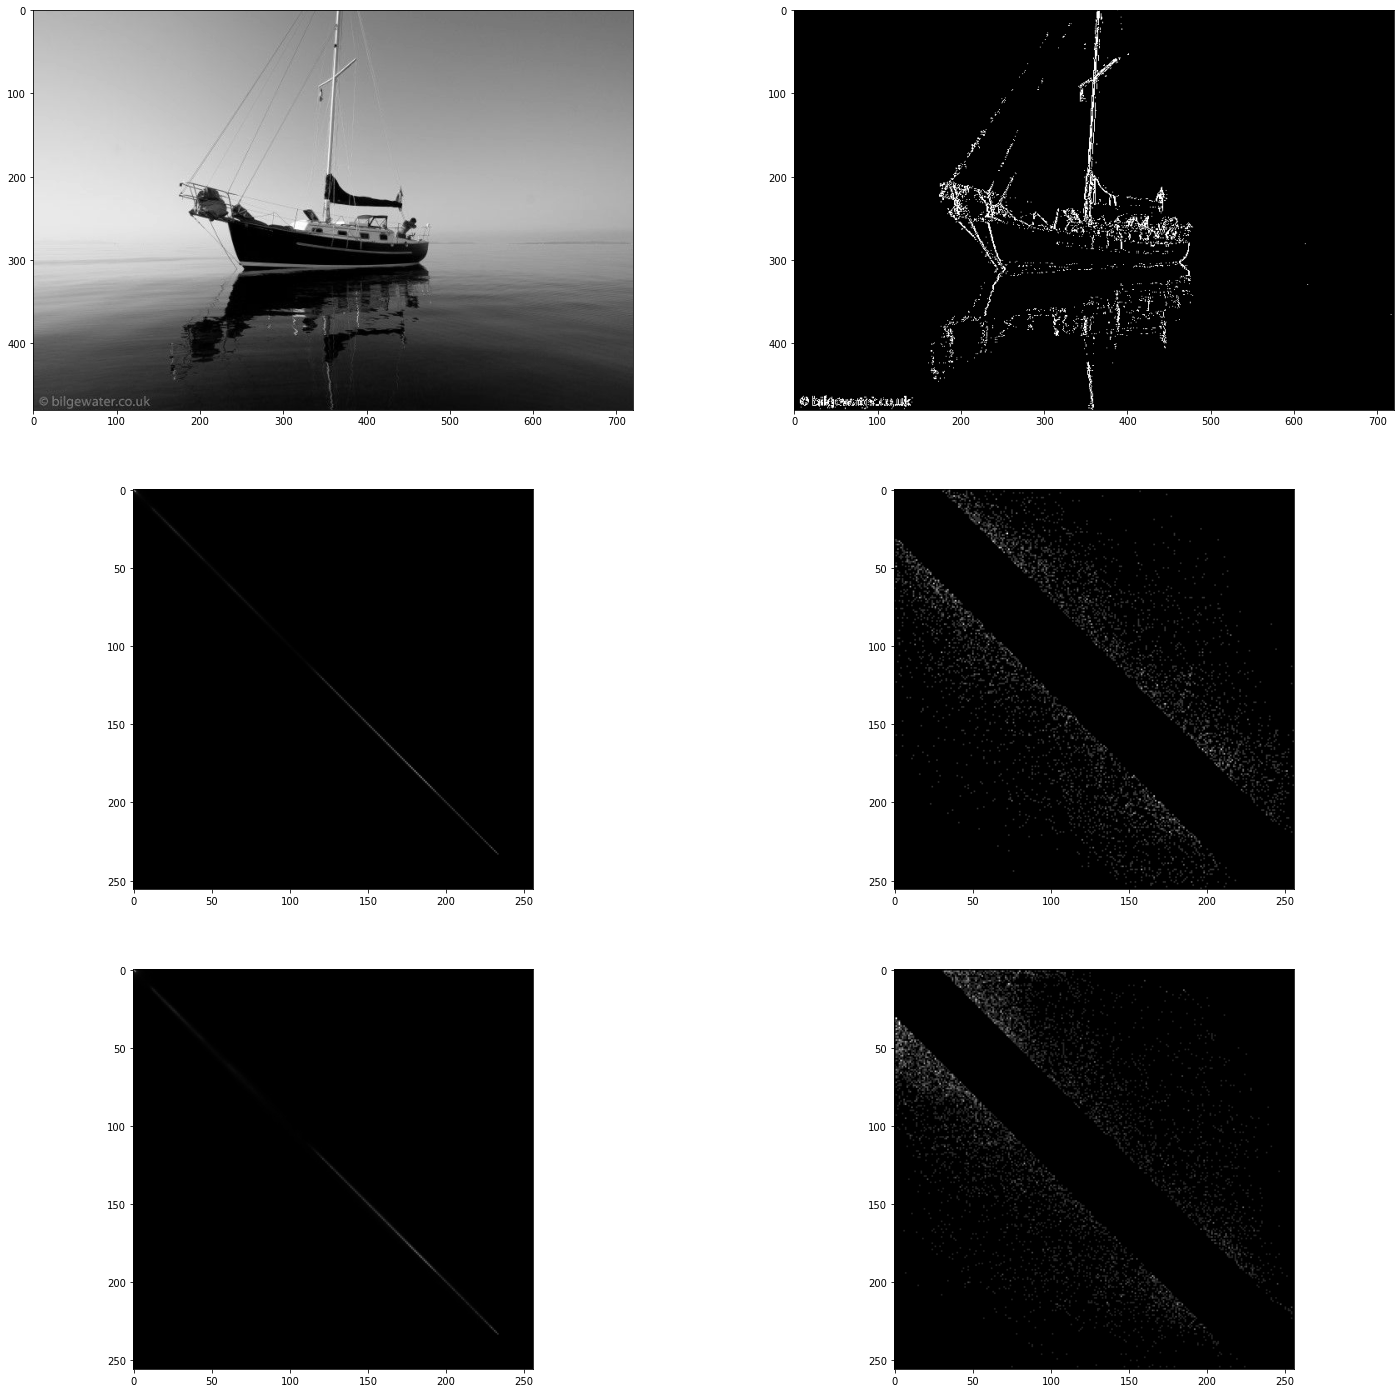

In [8]:
# Split the screen into 6 pictures
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(img,  cmap = 'gray')

plt.subplot(3,2,2)
plt.imshow(newImageArray,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(matrixEW,  cmap = 'gray')

plt.subplot(3,2,4)
plt.imshow(matrixNullEW,   cmap = 'gray')

plt.subplot(3,2,5)
plt.imshow(martixNS,  cmap = 'gray')


plt.subplot(3,2,6)
plt.imshow(matrixNullNS,  cmap = 'gray')

plt.show()

In [9]:
# Task 2 

In [10]:
# calculate integral image 
# We have two nested loops each time complexity is O(r*c) so O(2r*c) which is O(r*c)
# we have additional space complexity O(r*c)
# calculate integral image of a 2d image
def integralArray(im):
    result = [[0 for x in range(len(im[0]))] for y in range(len(im))]
    for k in range(0,len(im)):
        result[k][0] = im[k][0]
    for j in range (1,len(im[0])):
        for i in range (0,len(im)):   
            result1[i][j] = im[i][j] + result[i][j-1]
    for i in range (1,len(im)):
        for j in range (0,len(im[0])):   
            result2[i][j] = result2[i][j] + result1[i-1][j]
    return result

In [11]:
# calculate localSum 
# this calculated using O(1) + O(r*c) == O(r*c)
# space complexity is O(r*c)
# calculate the local sum given the top left and bottom right corners and raw image
def localSum(img,topLeft,bottomRight):
    integralImage = integralArray(img)
    sum = integralImage[bottomRight[0]][bottomRight[1]] + integralImage[topLeft[0]][topLeft[1]] - integralImage[bottomRight[0]][topLeft[1]] - integralImage[topLeft[0]][bottomRight[1]]
    return sum

In [12]:
# Space and Time Complexity is O(1)
# calculate the local sum given the top left and bottom right corners and integral image
def localSumII(integralImage,topLeft,bottomRight):
     return (integralImage[bottomRight[0]][bottomRight[1]] + integralImage[topLeft[0]][topLeft[1]] - integralImage[bottomRight[0]][topLeft[1]] - integralImage[topLeft[0]][bottomRight[1]])

In [13]:
# given a raw image and an 2d array as window size we first transform it to 2d image and squared 2d image
# we calculate integral image of the original and squared image
# we then iterate over all cells except for the top most and left most , right most and the bottom corner to have the cell in the middle of the window
# we calculate the variance from local sum of the integral image
# we calculate the squared variance from local sum of the squared integral image
# we minus them
# we choose the maximum of 0 and the final variance 
def imgWithIntegral(img,w): # T : O(r*c) S:O(r*c)
    im,sqr = toArrayAndSquare(img)  # T : O(r*c) S : O(r*c)
    integralImage = integralArray(im) # T : O(r*c) S : O(r*c)
    integralImageSquare = integralArray(sqr) # T : O(r*c) S : O(r*c)
    n = w[0] * w[1] #O(1)
    result = [] #O(1)
    result.append([0]*len(integralImage[0]))  #O(1)
    
    for i in range (w[0]//2,len(im)-w[0]//2):  #nearly O(r*c)
        row = [0]
        for j in range (w[1]//2,len(im[0])-w[1]//2): #O(c*)
            var = localSumII(integralImage,[i-(w[0]//2),j-(w[1]//2)],[i+(w[0]//2),j+(w[1]//2)])
            varSquare = localSumII(integralImageSquare,[i-(w[0]//2),j-(w[1]//2)],[i+(w[0]//2),j+(w[1]//2)])
            final_var = ((1/n) * varSquare) - (((1/n)* var)**2)
            #print(final_var)
            var = max(0,final_var)
            row.append(var) #O(1)
        row.append(0)
        result.append(row)
    result.append([0]*len(integralImage[0]))
    #print(result)
    return result

In [14]:
# def matrix_to_array(matrix):
#     array = []
#     for y in range(len(matrix[0])):
#         for x in range(len(matrix)):
#             array.append(matrix[x][y])
#     return array

In [15]:
# def matrix_to_array(matrix):
#     array = []
#     for x in range(len(matrix)):
#         for y in range(len(matrix[0])):
#             array.append(matrix[x][y])
#     return array

In [16]:
im = Image.open('sample_image.jpg')
im = im.convert("L") #1
twoD_image, twoD_image_squared = toArrayAndSquare(im)
start = timer()
varImage = imgWithIntegral(im,[3,3])
ii = integralArray(twoD_image)
ii_s = integralArray(twoD_image_squared)
res = applyThreshold(varImage,750)
end = timer()
print(end - start)

2.443450651


# **Plotting 6 images in a 3x2 bounding box in gray-scale mode**

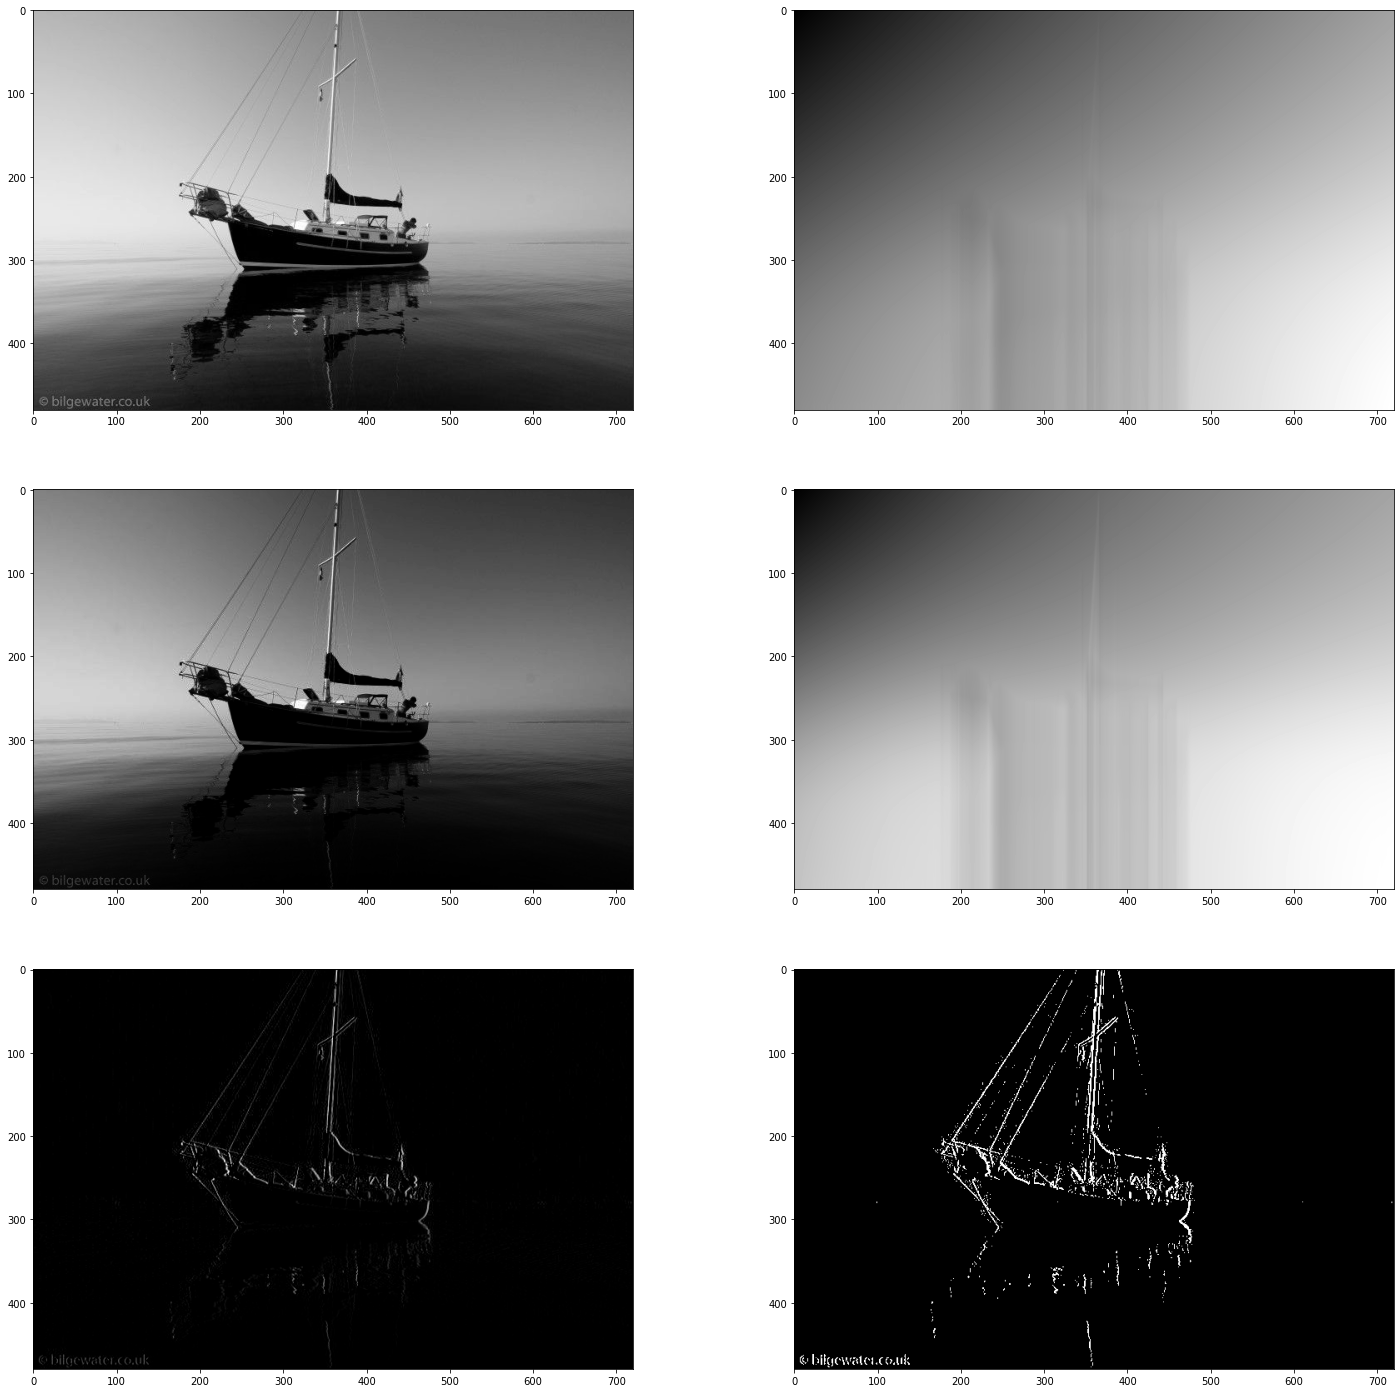

In [17]:

#plt has to be imported, see the previous sections
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(im,  cmap = 'gray')

plt.subplot(3,2,2)
#plt.imshow(image_out_integral,  cmap = 'gray')
plt.imshow(ii,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(twoD_image_squared,  cmap = 'gray')
# The image is a bit darker 
plt.subplot(3,2,4)
#plt.imshow(image_out_squared,  cmap = 'gray')
plt.imshow(ii_s,  cmap = 'gray')

plt.subplot(3,2,5)
plt.imshow(varImage,  cmap = 'gray')
# the var image without threshold have non bright edges but somewhat sharp edges
plt.subplot(3,2,6)
plt.imshow(res,  cmap = 'gray')
# after applying the threshold method the edges became brighter but not as sharp as the var image because every bright pixel will be transformed to a white pixel
# The edges became softer because there were comparatively dark pixels but were transformed to white because they are above the threshold